In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ابتدا داده ها را خوانده و اطلاعات کلی را بررسی میکنیم

In [13]:
# Import dataset
df = pd.read_csv("./diabetes.csv")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.drop(["unnamed:_0"], axis=1)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   diabetes_binary            70692 non-null  float64
 1   highbp                     70692 non-null  float64
 2   high_cholesterol           70692 non-null  float64
 3   cholesterol_check          70692 non-null  float64
 4   bmi                        70691 non-null  float64
 5   smoker                     70692 non-null  float64
 6   stroke                     70692 non-null  float64
 7   heartdiseaseorattack       70691 non-null  float64
 8   physical_activity          70691 non-null  float64
 9   fruits                     70690 non-null  float64
 10  veggies                    70691 non-null  float64
 11  heavy_alcohol_consumption  70691 non-null  float64
 12  any_health_care            70690 non-null  float64
 13  no_doctor_because_of_cost  70690 non-null  flo

diabetes_binary              0
highbp                       0
high_cholesterol             0
cholesterol_check            0
bmi                          1
smoker                       0
stroke                       0
heartdiseaseorattack         1
physical_activity            1
fruits                       2
veggies                      1
heavy_alcohol_consumption    1
any_health_care              2
no_doctor_because_of_cost    2
general_health               1
mental_health                1
physical_health              1
difficulty_walking           2
sex                          1
age                          1
education                    1
income                       1
dtype: int64

<div dir=rtl>


<b>‫حذف داده های پوچ:
</b>

چون تعداد داده های پوچ (20 خطا در 6 سطر) نسبت به تعداد سطر ها (70692) بسیار کمتر است، پس حذف این سطر ها راحت ترین کار است و به داده ها نیز آسیبی وارد نمیکند و مدت زمان پردازشی کمتری نسبت به روش های جایگزینی دیگر دارد
</div>



In [14]:
## drop rows with nan
df_nan = df[df.isna().any(axis=1)]
df = df.drop(df_nan.index)
## reset index
df = df.reset_index()
df = df.drop(['index'], axis=1)
df

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heartdiseaseorattack,physical_activity,fruits,...,any_health_care,no_doctor_because_of_cost,general_health,mental_health,physical_health,difficulty_walking,sex,age,education,income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,Medium,5.0,30.0,0.0,male,4.0,Cat6,Cat8
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,Medium,0.0,0.0,0.0,male,12.0,Cat6,Cat8
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,High,0.0,10.0,0.0,male,13.0,Cat6,Cat8
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Medium,0.0,3.0,0.0,male,11.0,Cat6,Cat8
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,Good,0.0,0.0,0.0,female,8.0,Cat5,Cat8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70681,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,0.0,female,6.0,Cat4,Cat1
70682,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Good,0.0,0.0,1.0,male,10.0,Cat3,Cat6
70683,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,Very Low,15.0,0.0,1.0,female,13.0,Cat6,Cat4
70684,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,Low,0.0,0.0,1.0,female,11.0,Cat2,Cat4


<div dir=rtl>
    <b>
نرمالیزه کردن:
    </b>

 داده های هر ستون را بررسی کرده و در صورت نیاز اصلاح میکنیم. مثلا بررسی میکنیم ستون هایی که باینری هستند فقط شامل 0 و 1 باشند یا داده ها case sensitive نباشند

سپس داده ها را نرمال میکنیم

</div>

In [15]:
## replace white spaces & lower case data
df = df.replace(' ', '_', regex=True)
for col in ['general_health', 'education', 'income']:
    df[col] = df[col].str.lower()

## normalization
df['bmi'] = df['bmi'] // 10
df['mental_health'] = df['mental_health'] // 3
df['physical_health'] = df['physical_health'] // 3
df['age'] = df['age'] // 2

## get all unique values in columns
pd.unique(df['general_health'])
for k in df.keys():
    print("->{}({}): {}".format(k, len(df[k]), pd.unique(df[k])))


->diabetes_binary(70686): [0. 1.]
->highbp(70686): [1. 0.]
->high_cholesterol(70686): [0. 1.]
->cholesterol_check(70686): [1. 0.]
->bmi(70686): [2. 1. 3. 5. 4. 6. 9. 7. 8.]
->smoker(70686): [0. 1.]
->stroke(70686): [0. 1.]
->heartdiseaseorattack(70686): [0. 1.]
->physical_activity(70686): [1. 0.]
->fruits(70686): [0. 1.]
->veggies(70686): [1. 0.]
->heavy_alcohol_consumption(70686): [0. 1.]
->any_health_care(70686): [1. 0.]
->no_doctor_because_of_cost(70686): [0. 1.]
->general_health(70686): ['medium' 'high' 'good' 'low' 'very_low']
->mental_health(70686): [ 1.  0.  2. 10.  6.  5.  3.  8.  4.  9.  7.]
->physical_health(70686): [10.  0.  3.  1.  2.  5.  4.  8.  7.  6.  9.]
->difficulty_walking(70686): [0. 1.]
->sex(70686): ['male' 'female']
->age(70686): [2. 6. 5. 4. 0. 3. 1.]
->education(70686): ['cat6' 'cat5' 'cat4' 'cat3' 'cat2' 'cat1']
->income(70686): ['cat8' 'cat7' 'cat6' 'cat3' 'cat4' 'cat1' 'cat5' 'cat2' 'unknown']


<div dir=rtl>
یافتن ویژگی های دسته بندی شده با
    <b>One Hot Encoding</b>



</div>

In [16]:
## one hot encoding categorical columns
for col in ['general_health', 'sex', 'education', 'income']:
    one_hot = pd.get_dummies(df[col], prefix=col)
    ## add new columns
    df = df.join(one_hot)
    ## drop col
    df = df.drop(col, axis=1)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70686 entries, 0 to 70685
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   diabetes_binary            70686 non-null  float64
 1   highbp                     70686 non-null  float64
 2   high_cholesterol           70686 non-null  float64
 3   cholesterol_check          70686 non-null  float64
 4   bmi                        70686 non-null  float64
 5   smoker                     70686 non-null  float64
 6   stroke                     70686 non-null  float64
 7   heartdiseaseorattack       70686 non-null  float64
 8   physical_activity          70686 non-null  float64
 9   fruits                     70686 non-null  float64
 10  veggies                    70686 non-null  float64
 11  heavy_alcohol_consumption  70686 non-null  float64
 12  any_health_care            70686 non-null  float64
 13  no_doctor_because_of_cost  70686 non-null  flo

,diabetes_binary,highbp,high_cholesterol,cholesterol_check,bmi,smoker,stroke,heartdiseaseorattack,physical_activity,fruits,...,education_cat6,income_cat1,income_cat2,income_cat3,income_cat4,income_cat5,income_cat6,income_cat7,income_cat8,income_unknown
0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
3,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70681,1.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
70682,1.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
70683,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
70684,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


<div dir=rtl> و ستون diabetes_binary را جدا میکنیم. سپس به دو دسته train و test جهت آموزش تقسیم میکنیم.



</div>

In [17]:
from sklearn.model_selection import train_test_split
## pop result column to y
y = df.pop('diabetes_binary')
X = df
## split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , random_state=123
                                                   )


<div dir=rtl>

<b>ساخت مدل طبقه بند</b>
    


</div>

In [18]:
from xgboost import XGBClassifier

model = XGBClassifier(
    learning_rate =0.1,
    max_depth=4,
    n_estimators=200,
    subsample=0.5,
    colsample_bytree=1,
    random_state=123,
    eval_metric='auc',
    verbosity=1,
)
model.fit(
    X_train, y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10,
)
model

[0]	validation_0-auc:0.7843	validation_1-auc:0.787913
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.797016	validation_1-auc:0.799299
[2]	validation_0-auc:0.8059	validation_1-auc:0.808169
[3]	validation_0-auc:0.807038	validation_1-auc:0.810393
[4]	validation_0-auc:0.808703	validation_1-auc:0.811362
[5]	validation_0-auc:0.80924	validation_1-auc:0.812301
[6]	validation_0-auc:0.809451	validation_1-auc:0.81269
[7]	validation_0-auc:0.8101	validation_1-auc:0.813266
[8]	validation_0-auc:0.810734	validation_1-auc:0.813239
[9]	validation_0-auc:0.811973	validation_1-auc:0.814561
[10]	validation_0-auc:0.81215	validation_1-auc:0.814908
[11]	validation_0-auc:0.813877	validation_1-auc:0.816322
[12]	validation_0-auc:0.815004	validation_1-auc:0.817356
[13]	validation_0-auc:0.815578	validation_1-auc:0.818117
[14]	validation_0-auc:0.816313	validation_1-auc:0.818731
[15]	va

XGBClassifier(eval_metric='auc', max_depth=4, n_estimators=200,
              random_state=123, subsample=0.5)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

## cal train accuracy
y_pred = model.predict(X_train)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

## cal test accuracy
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

## confusion matrix
data = {'y_test': y_test, 'y_pred': y_pred,}
confusion_matrix_df = pd.DataFrame(data, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(confusion_matrix_df['y_test'], confusion_matrix_df['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print()
print(confusion_matrix)

## cal precision & recall
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
precision = precision[1];recall = recall[1]
print('\nrecall_Score:', recall)
print('precision_Score:', precision)


Train Accuracy: 75.31%
Test Accuracy: 75.29%

Predicted   0.0   1.0
Actual               
0.0        5051  2061
1.0        1432  5594

recall_Score: 0.7961855963563905
precision_Score: 0.7307642064010451


<div dir=rtl>

حال با کمک GridSearchCV امتیاز حالات مختلف را بررسی میکنیم


</div>

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
def my_roc_auc_score(model, X, y):
    return roc_auc_score(y, model.predict_proba(X)[:,1])
params = {
    'learning_rate': [0.02, 0.05, 0.1, 0.3],
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 1],
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring=my_roc_auc_score,
    cv=3,
    n_jobs=-1,
)
gsearch.fit(X_train, y_train)




GridSearchCV(cv=3,
             estimator=XGBClassifier(eval_metric='auc', max_depth=4,
                                     n_estimators=200, random_state=123,
                                     subsample=0.5),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.02, 0.05, 0.1, 0.3],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring=<function my_roc_auc_score at 0x7fbc879815f0>)

In [21]:
print(gsearch.best_score_)
print(gsearch.score(X_train, y_train))
print(gsearch.score(X_test, y_test))
print(gsearch.best_estimator_)

print("\ngsearch best params:")
print(gsearch.best_params_)


0.825565339882985
0.8303028047409642
0.8307108527798244
XGBClassifier(eval_metric='auc', learning_rate=0.05, n_estimators=300,
              random_state=123, subsample=0.5)

gsearch best params:
{'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}



<div dir=rtl>
بهترین مجموعه پارامتر هارا بدست آوردیم.

:دقت مدل و ماتریس درهم ریختگی را محاسبه میکنیم

</div>



In [22]:
model2 = gsearch
# model2 = XGBClassifier(
#     learning_rate =0.,
#     max_depth=,
#     n_estimators=200,
#     subsample=0.5,
#     colsample_bytree=1,
#     random_state=123,
#     eval_metric='auc',
#     verbosity=1,
# )
# model2.fit(
#     X_train, y_train, 
#     eval_set=[(X_train, y_train), (X_test, y_test)], 
#     early_stopping_rounds=10,
# )



## cal train accuracy
y_pred = model2.predict(X_train)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_train, predictions)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

## cal test accuracy
y_pred = model2.predict(X_test)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

## confusion matrix
data = {'y_test': y_test, 'y_pred': y_pred,}
confusion_matrix_df = pd.DataFrame(data, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(confusion_matrix_df['y_test'], confusion_matrix_df['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print()
print(confusion_matrix)

## cal precision & recall
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
precision = precision[1];recall = recall[1]
print('\nrecall_Score:', recall)
print('precision_Score:', precision)


Train Accuracy: 75.16%
Test Accuracy: 75.31%

Predicted   0.0   1.0
Actual               
0.0        5075  2037
1.0        1453  5573

recall_Score: 0.7931966979789353
precision_Score: 0.7323258869908016


<div dir=rtl>

    
    

هر پلات رابطه یک پارامتر با امتیاز میانگین را نشان میدهد.

مثلا ضریب یادگیری روند کاهشی داشته اما n_estimators افزایش است
    
    
   
</div>






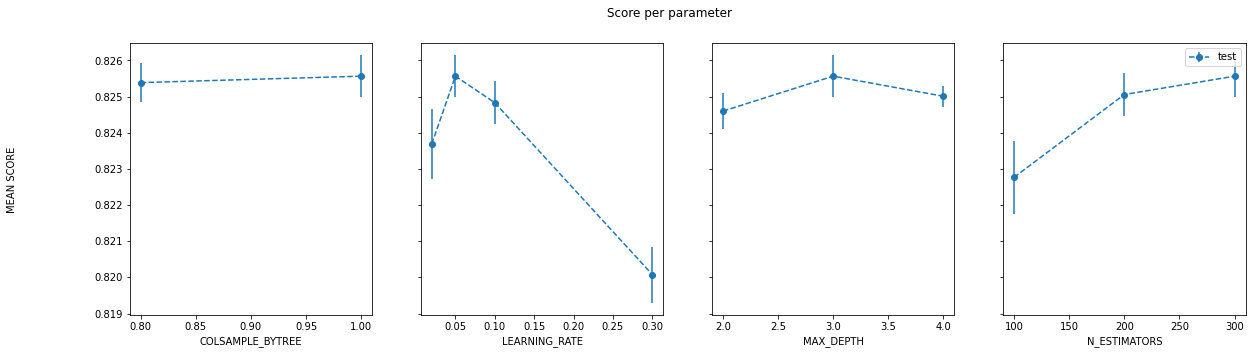

In [23]:
def plot_search_results(grid):
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']

    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(gsearch)